In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random

## Enclosing subgraph extraction

* we extract the surrounding subgraph around a link (2 vertices)  
* the size of $K$ vertices is user defined  
* for an edge $(x,y)$ we first add the ordered node list of $x$ and $y$ neighbors to $V_K$  
* then the next order neighbors until $|V_K| \ge K$  
* then crop or pad with zero the list to $K$  

In [30]:
g = nx.barabasi_albert_graph(10,5)

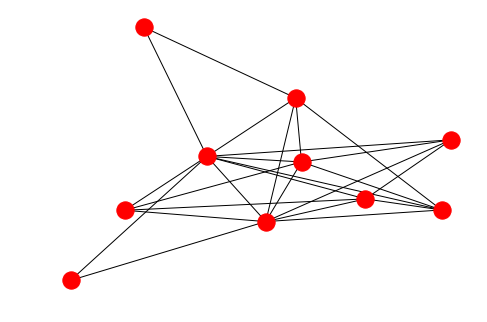

In [31]:
nx.draw(g)
plt.show()

In [38]:
e = list(g.edges())
e

[(0, 5),
 (0, 6),
 (0, 7),
 (0, 9),
 (1, 5),
 (1, 8),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 9),
 (4, 5),
 (4, 6),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8)]

In [39]:
ne = []
for _ in range(len(e)):
    ne.append((random.choice(list(g.nodes())), random.choice(list(g.nodes()))))

In [40]:
ne

[(8, 2),
 (0, 2),
 (9, 9),
 (4, 3),
 (9, 0),
 (1, 4),
 (9, 8),
 (3, 1),
 (1, 3),
 (1, 3),
 (9, 4),
 (0, 8),
 (2, 8),
 (3, 5),
 (3, 6),
 (6, 4),
 (6, 4),
 (4, 1),
 (1, 7),
 (0, 2),
 (1, 9),
 (0, 2),
 (2, 3),
 (3, 3),
 (7, 0)]

In [8]:
# select nodes
x,y = e[0]

In [9]:
# list of K nodes
Vk = [x,y]

In [10]:
Vk.extend(list(nx.neighbors(g,x)))
Vk.extend(list(nx.neighbors(g,y)))

In [11]:
Vk

[0, 3, 3, 0, 1, 2, 4]

In [12]:
k = 5
#crop
Vk_copped = Vk[:k]

In [13]:
Vk_copped

[0, 3, 3, 0, 1]

In [14]:
l = len(Vk)-k

In [15]:
l

2

In [22]:
k = 10
# padding
if k > len(Vk):
    Vk_padded = Vk.copy()
    l = k-len(Vk)
#     print(l)
    dummies = ['D%02d' % i for i in range(l)]
       
    Vk_padded.extend(dummies)

In [23]:
Vk_padded

[0, 3, 3, 0, 1, 2, 4, 'D00', 'D01', 'D02']

In [104]:
def sub_graph(g,e,k=10):
    # select nodes
    x,y = e
    # list of K nodes
    Vk = [x,y]
    while len(Vk)<k:
        x_nbg = list(nx.neighbors(g,x))
        y_nbg = list(nx.neighbors(g,y))
        Vk.extend(x_nbg)
        Vk.extend(y_nbg)
    if k < len(Vk):
        Vk_cropped = Vk[:k+1]
        G = nx.Graph(nx.subgraph(g, Vk_cropped))
    return G

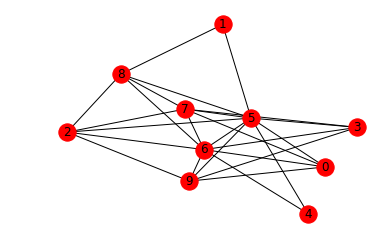

In [105]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos=pos)
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_labels(g, pos)
plt.axis('off')
plt.show()

In [106]:
e[0]

(0, 5)

In [113]:
g1 = sub_graph(g,e[0], k=6)

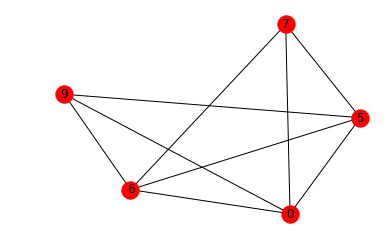

In [114]:
pos = nx.spring_layout(g1)
nx.draw_networkx_nodes(g1, pos=pos)
nx.draw_networkx_edges(g1,pos)
nx.draw_networkx_labels(g1, pos)
plt.axis('off')
plt.show()

In [115]:
e[1]

(0, 6)

In [116]:
g1 = sub_graph(g,e[1], k=6)

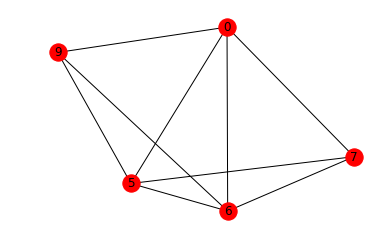

In [117]:
pos = nx.spring_layout(g1)
nx.draw_networkx_nodes(g1, pos=pos)
nx.draw_networkx_edges(g1,pos)
nx.draw_networkx_labels(g1, pos)
plt.axis('off')
plt.show()

In [118]:
import pyprimesieve

In [121]:
pyprimesieve.primes_nth(6)

13